https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

# Setup: Check libraries

In [2]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.1 (v3.6.1:69c0db5050, Mar 21 2017, 01:21:04) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
scipy: 0.19.1
numpy: 1.13.1
matplotlib: 2.0.2
pandas: 0.20.3
sklearn: 0.19.0


# Setup: Loading libraries

In [3]:
# Load libraries
import certifi
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Loading Iris Sample Dataset

In [4]:
# Load dataset
url = "/Users/albertasuncion_mac/Documents/SMU/Machine Learning/Github/Python-ML-Basics/data/Iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Understanding Dataset

In [5]:
# dataset dimension
print(dataset.shape)

(150, 5)


In [6]:
# inspect head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [7]:
# dataset stat summary
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
# dataset class
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Data Visualizations

In [9]:
# Plot dpi function
def scale_plot_size(factor=1.5):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor

In [10]:
# Plot dpi function
def plot_dpi(dpi):
    plt.subplots(dpi=dpi)

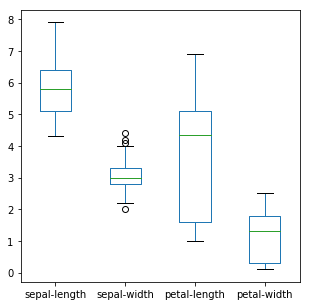

In [11]:
# box and whisker plots, default colors
#scale_plot_size(factor=1)

dataset.plot(kind='box',figsize=(5,5))
plt.show()

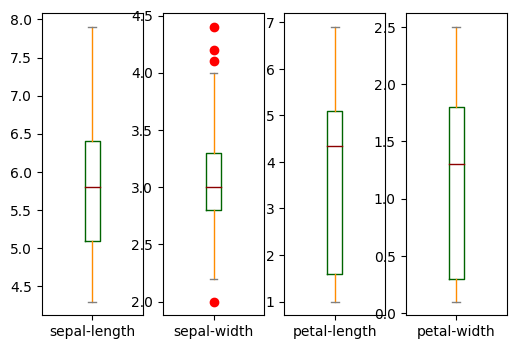

In [12]:
# box and whisker plots, custom colors using keyword dict, custom point using kw sym, kw vert to change orientation
scale_plot_size(factor=1)
color=dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkRed', caps='Gray')
dataset.plot(kind='box', color=color, sym='ro', vert=True, subplots=True)
plt.show()

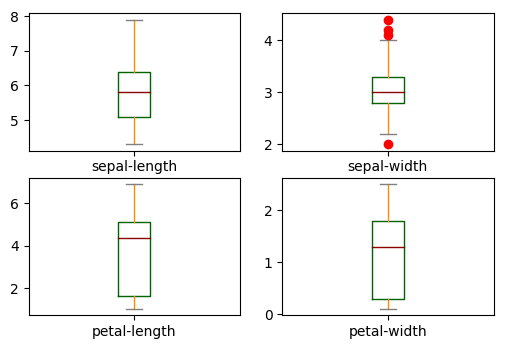

In [13]:
# box and whisker plots
scale_plot_size(factor=1)
dataset.plot(kind='box', color=color, sym='ro', vert=True, layout=(2,2), subplots=True, sharex=False, sharey=False)
plt.show()

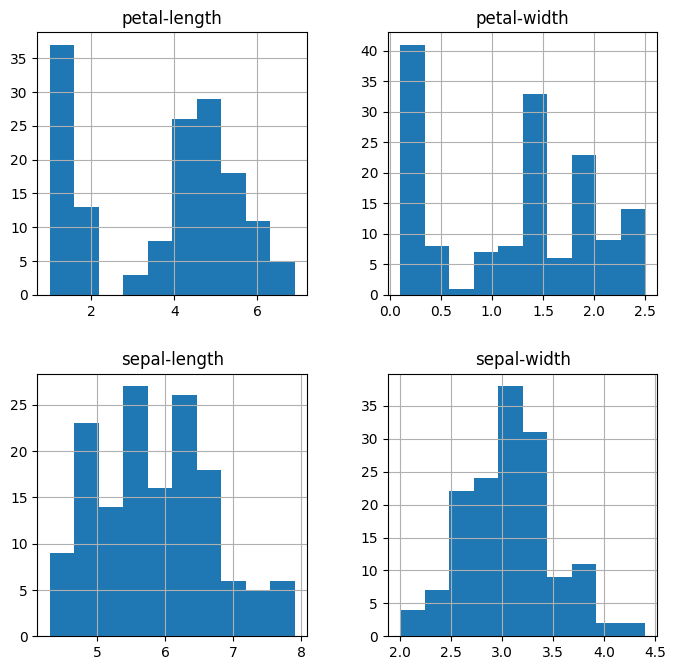

In [14]:
# histograms
#scale_plot_size(factor=2)
dataset.hist(figsize=(8,8))
plt.show()

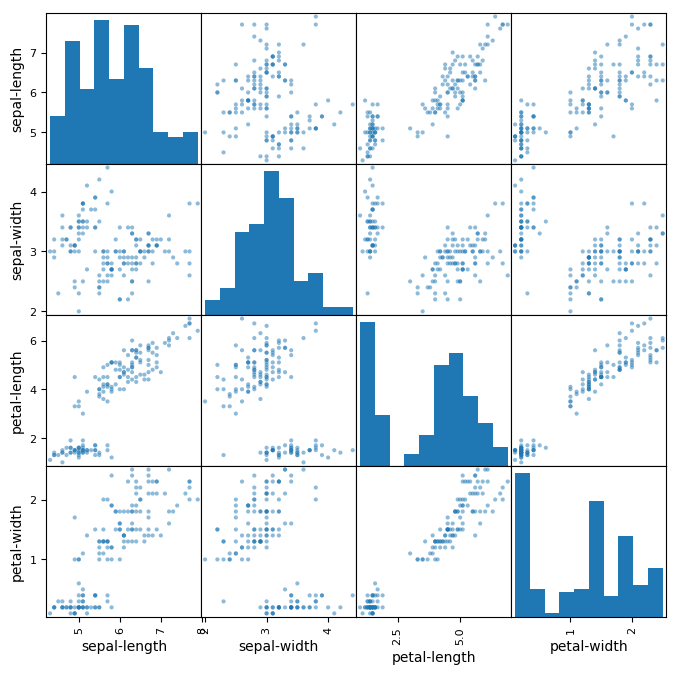

In [15]:
# matrix plot
scatter_matrix(dataset, figsize=(8,8))
plt.show()

# Data Preparation

## Data preprocessing

### This section is for cleaning data and all data preprocessing activities.

## Create Train, Test, Validation Datasets

In [25]:
# Convert list to array
array = dataset.values

# Split independent variables (X) from dependent (Y)
X = array[:,0:4]
Y = array[:,4]
print(X[:5,:]) #validate split, X should have multiple columns
print(Y[:5]) # Y is only a single column array

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [27]:
# Splitting datasets using sklearn.model_selection.train_test_split(*arrays, **options)
validation_size=0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [39]:
# Validate splits
print("Shape of original dataset:", dataset.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_validation:", X_validation.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_validation:", Y_validation.shape)

Shape of original dataset: (150, 5)
Shape of X_train: (120, 4)
Shape of X_validation: (30, 4)
Shape of Y_train: (120,)
Shape of Y_validation: (30,)


## Setup model algorithms

In [45]:
# Setup an array with the names and model algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Validate array
print(models[:])

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('CART', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')), ('NB', GaussianNB(priors=None)), ('SVM', 

In [49]:
# Evaluate each model in turn

# Testing options and evaluation metric
seed = 7
scoring ='accuracy'

# Setup results and model names arays
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


#### Modeling specific references:
`scoring=` parameters can be found here http://scikit-learn.org/stable/modules/model_evaluation.html

`kfold` explanation here https://magoosh.com/data-science/k-fold-cross-validation/

# Other References

Relationship between figure size and dpi:
https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size?noredirect=1&lq=1

Matplotlb kwargs reference: https://matplotlib.org/api/pyplot_api.html